In [28]:
import tensorflow as tf
import numpy as np
import logging
import pandas as pd

traditional programming VS Machine Learning

In [29]:
celsius = int(input("Enter the Temperature in Celsius :\n"))
fahrenheit = (1.8 * celsius) + 32
print("Temperature in Fahrenheit :", fahrenheit)

Enter the Temperature in Celsius :
38
Temperature in Fahrenheit : 100.4


In [3]:
f = float(input("Enter temperature in Fahrenheit: "))
celsius = (f - 32) * 5/9
print(f"{f} in Fahrenheit is equal to {celsius} in Celsius")

Enter temperature in Fahrenheit: 100
100.0 in Fahrenheit is equal to 37.77777777777778 in Celsius


In [30]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

In [31]:
for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [32]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [33]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [34]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


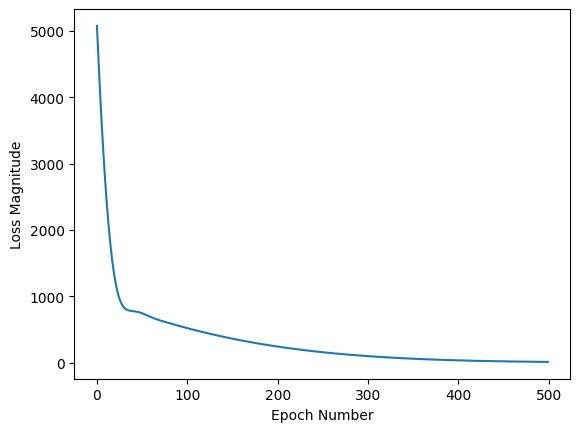

In [35]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [36]:
import numpy as np
print(model.predict(np.array([[38]])))  # Ensure input is 2D


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[98.12688]]


In [16]:
print("These are the layer variables: {}".format(model.get_weights()))

These are the layer variables: [array([[1.8256061]], dtype=float32), array([28.739744], dtype=float32)]


In [17]:
weights=model.get_weights()[0]
weights

array([[1.8256061]], dtype=float32)

In [18]:
bises=model.get_weights()[1]
bises

array([28.739744], dtype=float32)

In [19]:
38*weights+bises

array([[98.11278]], dtype=float32)

Y=mx+c

### building a three layers ANN

In [39]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
l1 = tf.keras.layers.Dense(units=4)

In [41]:
# l2 = tf.keras.layers.Dense(units=4)

In [49]:
l2 = tf.keras.layers.Dense(units=1)

In [43]:
model = tf.keras.Sequential([l0, l1, l2])

In [44]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [45]:
history=model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


In [47]:
# print(model.predict([38]))
import numpy as np
print(model.predict(np.array([[38]])))  # Ensure input is 2D

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[100.274574]]


In [ ]:
# import matplotlib.pyplot as plt
# plt.xlabel('Epoch Number')
# plt.ylabel("Loss Magnitude")
# plt.plot(history.history['loss'])

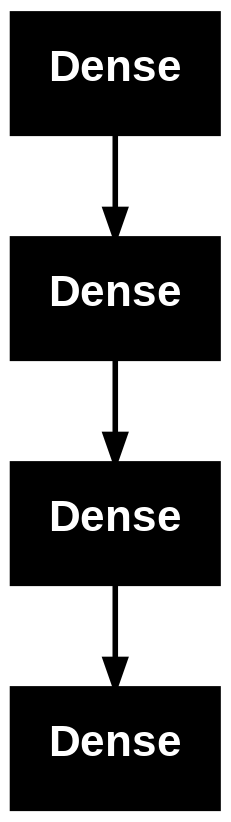

In [48]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

These are the l0 variables: [array([[-0.3896574 ,  0.33379474, -0.8508863 ,  0.23706976]],
      dtype=float32), array([-2.023834 ,  3.453552 , -3.3453915, -2.9104087], dtype=float32)]
These are the l1 variables: [array([[-1.2907435e+00,  7.8267105e-02,  9.8815791e-02, -3.8022372e-01],
       [ 9.9081206e-01, -9.6093678e-01,  6.3811219e-01, -7.1300421e-04],
       [ 9.0455097e-01,  1.3814577e+00, -6.7037743e-01, -1.3097182e-02],
       [ 4.2398650e-02,  1.5140449e+00, -8.1838119e-01, -3.3681992e-01]],
      dtype=float32), array([-0.0717748, -3.7029984,  2.7660599,  2.9547083], dtype=float32)]
These are the l2 variables: [array([[ 0.28209177],
       [-1.1482533 ],
       [ 0.71580553],
       [ 0.5278712 ]], dtype=float32), array([3.3183923], dtype=float32)]


In [ ]:
# Get weights and biases for each layer
for i, layer in enumerate(model.layers):
    layer_name = layer.name
    layer_weights = layer.get_weights()

    if layer_weights:
        weights, biases = layer_weights
        print(f"Layer {i + 1}: {layer_name}")
        print(f"Weights shape: {weights.shape}")
        print(f"Biases shape: {biases.shape}")
        print("Weights:")
        print(weights)
        print("Biases:")
        print(biases)
        print("\n")


Layer 1: dense_1
Weights shape: (1, 4)
Biases shape: (4,)
Weights:
[[-0.34058627 -0.20138146 -0.15081528 -0.527329  ]]
Biases:
[-3.6548307 -3.567307  -3.4628568 -3.6208272]


Layer 2: dense_2
Weights shape: (4, 4)
Biases shape: (4,)
Weights:
[[ 6.9794697e-01  1.2700734e+00 -7.0219073e-03 -1.0780941e-03]
 [-6.9153780e-01  9.2018211e-01 -2.0263830e-01  1.9020346e-01]
 [ 1.5712149e-01  1.0686828e+00  2.8215569e-01  2.0459321e-01]
 [ 3.8888904e-01  8.4808797e-01  2.9637787e-01 -1.9130871e-01]]
Biases:
[-3.2401087 -3.639194  -3.2926533 -0.7770597]


Layer 3: dense_3
Weights shape: (4, 1)
Biases shape: (1,)
Weights:
[[-0.4375459 ]
 [-1.297705  ]
 [-0.45611238]
 [-0.23538324]]
Biases:
[3.4093869]




In [ ]:
# Extract the weights and biases
weights_l0, biases_l0 = l0.get_weights()
weights_l1, biases_l1 = l1.get_weights()
weights_l2, biases_l2 = l2.get_weights()

In [ ]:
weights_l1

array([[-1.2907435e+00,  7.8267105e-02,  9.8815791e-02, -3.8022372e-01],
       [ 9.9081206e-01, -9.6093678e-01,  6.3811219e-01, -7.1300421e-04],
       [ 9.0455097e-01,  1.3814577e+00, -6.7037743e-01, -1.3097182e-02],
       [ 4.2398650e-02,  1.5140449e+00, -8.1838119e-01, -3.3681992e-01]],
      dtype=float32)

In [ ]:
x=38

In [ ]:
output_l0 = l0.activation(np.dot(np.array([x]), weights_l0) + biases_l0)
output_l0

array([-16.83081549,  16.13775223, -35.67907035,   6.09824198])

In [ ]:
output_l1 = l1.activation(np.dot(output_l0, weights_l1) + biases_l1)
output_l1

array([  5.62698953, -60.58377127,  30.32836297,   7.75596327])

In [ ]:
output_l2 = l2.activation(np.dot(output_l1, weights_l2) + biases_l2)
output_l2

array([100.27459582])

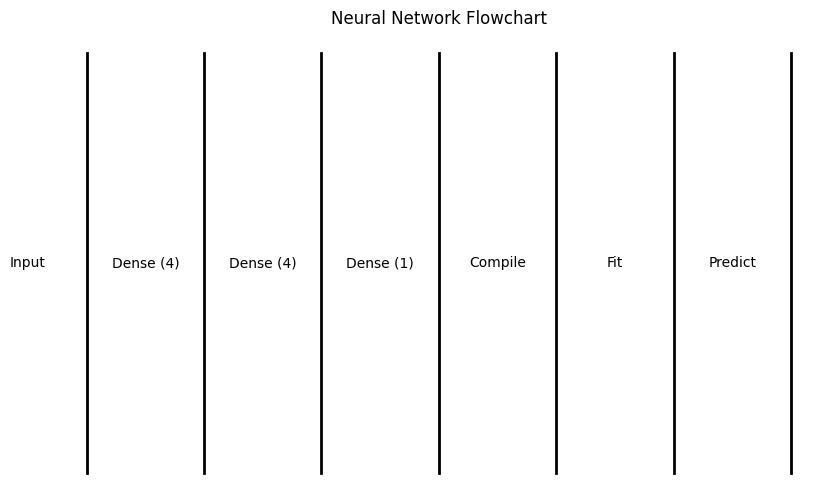

In [ ]:
import matplotlib.pyplot as plt

# Define the layers
layers = ['Input', 'Dense (4)', 'Dense (4)', 'Dense (1)', 'Compile', 'Fit', 'Predict']

# Create a flowchart diagram
plt.figure(figsize=(10, 6))
plt.plot([0.5, 0.5], [0, 1], 'k-', lw=2)
plt.plot([1.5, 1.5], [0, 1], 'k-', lw=2)
plt.plot([2.5, 2.5], [0, 1], 'k-', lw=2)
plt.plot([3.5, 3.5], [0, 1], 'k-', lw=2)
plt.plot([4.5, 4.5], [0, 1], 'k-', lw=2)
plt.plot([5.5, 5.5], [0, 1], 'k-', lw=2)
plt.plot([6.5, 6.5], [0, 1], 'k-', lw=2)

for i, layer in enumerate(layers):
    plt.text(i, 0.5, layer, ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round4'))

plt.axis('off')
plt.title('Neural Network Flowchart')
plt.show()


# working on titanic dataset

In [ ]:
from google.colab import files

# Upload a file from your local machine
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
url = "/content/train.csv"  # Update with the path to your dataset
df = pd.read_csv(url)
df

In [ ]:
# Drop irrelevant columns or fill missing values as needed
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df = df.dropna()
df.shape

In [ ]:
df

In [ ]:
df.info()

In [ ]:
# Convert categorical features to one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])
df

In [ ]:
df.isnull().sum()

In [ ]:
# Separate features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
X

In [ ]:
y

In [ ]:
df.shape

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# working od standard scalling

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


In [ ]:
# # Extract weights and outputs
# layer_weights = []
# layer_outputs = []

# for layer in model.layers:
#     # Get weights
#     weights, biases = layer.get_weights()
#     layer_weights.append((weights, biases))

#     # Get outputs for each layer
#     intermediate_layer_model = Sequential(model.layers[:model.layers.index(layer) + 1])
#     layer_output = intermediate_layer_model.predict(X_train)
#     layer_outputs.append(layer_output)

# # Print weights and outputs
# for i, (weights, biases) in enumerate(layer_weights):
#     print(f"Layer {i + 1} Weights:")
#     print(weights)
#     print(f"Layer {i + 1} Biases:")
#     print(biases)
#     print(f"Layer {i + 1} Outputs:")
#     print(layer_outputs[i])
#     print("\n")

# text dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Load the IMDB dataset
num_words = 10000  # Top 10,000 most frequent words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Get the word index from the dataset
word_index = imdb.get_word_index()

# Preprocess the data
max_len = 200  # Limit the length of each review
train_data = pad_sequences(train_data, maxlen=max_len, padding='post', truncating='post')
test_data = pad_sequences(test_data, maxlen=max_len, padding='post', truncating='post')

# Build the neural network
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_len))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_split=0.2)
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


In [ ]:
# Make predictions on new text data
new_text = ["I really enjoyed this movie!", "This movie was terrible..."]
new_sequences = [[word_index[word] if word in word_index else 0 for word in text.split()] for text in new_text]
new_padded = pad_sequences(new_sequences, maxlen=max_len, padding='post', truncating='post')

# Predict sentiments (positive or negative)
predictions = model.predict(new_padded)

# Print predictions
for i, prediction in enumerate(predictions):
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    print(f"Text: {new_text[i]}")
    print(f"Predicted Sentiment: {sentiment} (Probability: {prediction[0]:.4f})")
    print("\n")


In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
data, target = newsgroups.data, newsgroups.target

# Preprocess the data
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(data).toarray()

# Encode the labels
y = to_categorical(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)




In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

In [ ]:
# Make predictions on new text data
new_text = [
    "I really enjoyed learning about deep learning.",
    "The political situation is causing a lot of unrest.",
    "My computer is not working properly; can someone help me?",
    "The latest scientific discovery is groundbreaking."
]

# Convert new text data to TF-IDF vectors
new_text_tfidf = vectorizer.transform(new_text).toarray()

# Predict category probabilities
predictions = model.predict(new_text_tfidf)

# Print predictions
for i, prediction in enumerate(predictions):
    category_index = np.argmax(prediction)
    print(f"Text: {new_text[i]}")
    print(f"Predicted Category: {newsgroups.target_names[category_index]} (Probability: {prediction[category_index]:.4f})")
    print("\n")